In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# xử lý dữ liệu đầu vào

In [20]:
# import dữ liệu
data = pd.read_csv("hw8_cars.csv")
data.head()

,Price,miles(000),age,miles,year,model
0,15500,24.000,4,24000,2013,Ex-L
1,14000,4.800,3,4800,2014,Ex-L
2,13999,77.254,4,77254,2013,Ex-L
3,10900,40.000,9,40000,2008,Ex-L
4,10500,75.853,5,75853,2012,EX-T


In [21]:
data.isnull().sum()

Price         0
miles(000)    0
age           0
miles         0
year          0
model         0
dtype: int64

In [22]:
# xoá cột miles(000)
data = data.drop(columns=['miles(000)'])
data.tail()

,Price,age,miles,year,model
50,4950,12,145000,2005,DX
51,4200,13,132473,2004,DX
52,2500,18,200000,1999,DX
53,2500,14,122000,2003,DX
54,1000,20,196850,1997,DX


In [23]:
# lưu lại category của cột model
model_categories = data['model'].astype('category').cat.categories
print(model_categories)
# ĐỔI DỮ LIỆU CỘT MODEL THÀNH DẠNG SỐ
data['model'] = data['model'].astype('category').cat.codes
data.tail()


Index(['DX', 'EX-T', 'Ex-L', 'SE'], dtype='object')


,Price,age,miles,year,model
50,4950,12,145000,2005,0
51,4200,13,132473,2004,0
52,2500,18,200000,1999,0
53,2500,14,122000,2003,0
54,1000,20,196850,1997,0


# tính hệ số tương quan + heatmap

In [24]:
data.corr()

,Price,age,miles,year,model
Price,1.000000,-0.857075,-0.890479,0.857075,0.571045
age,-0.857075,1.000000,0.779441,-1.000000,-0.603611
miles,-0.890479,0.779441,1.000000,-0.779441,-0.592755
year,0.857075,-1.000000,-0.779441,1.000000,0.603611
model,0.571045,-0.603611,-0.592755,0.603611,1.000000


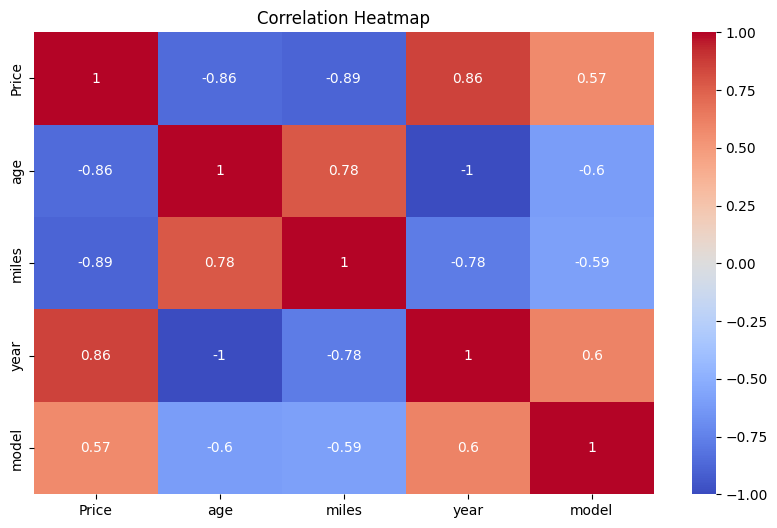

In [25]:
# vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# xây dựng mô hình hồi quy tuyến tính đa biến

In [26]:
# khai báo mô hình
model = LinearRegression()

# khai báo biến độc lập và phụ thuộc
y = data['Price']
X = data.drop(columns=['Price'])

In [27]:
# chia tap train : test(70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# huấn luyện mô hình
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# dự đoán
y_pred = model.predict(X_test)

# tính chỉ số MSE + R^2 (đánh giá mô hình)

In [32]:
mse = mean_squared_error(y_true=y_test,y_pred= y_pred)
r2 = model.score(X_test, y_test)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 (from model.score): {r2:.4f}')
print(f'R^2 (from r2_score): {r2_score}')


Mean Squared Error: 4439386.6496
R^2 (from model.score): 0.8167
R^2 (from r2_score): <function r2_score at 0x000001B5CD403380>
